### Title: The correlation between traffic fine frequencies and weather data (temperature, precipitation, and wind speed) in Bonn, Germany in the year 2020.
### Contents
1. Introduction: A brief overview of the project.
2. Datasets: A brief overview of the datasets.
3. Install Dependencies: Install the required dependencies.
4. Import Packages: Import the necessary packages.
5. Data Loading: Load the data into a notebook.
6. Data Inspection: Explore the dataset for basic understanding.
7. Data Visualization: Create visualizations to explore the data and gain insights.
8. Correlation Analysis: Analyze the correlation between data.
9. Summary: Summarize the key findings and insights obtained from the data exploration.
10. Future work: Analyze the scope of future work.

### Introduction
This project analyzes how weather condition relates to the speed limit on roads in the Bonn city area. Moreover, it analyzes the traffic fine occurrences due to exceeding the speed limit and its relation to temperature, wind, and precipitation in particular dates in 2020 from January to December.

The analysis helps to identify patterns in driving behavior related to weather conditions by combining the speeding fine dataset with weather data. Authorities can allocate resources such as police patrols or traffic cameras to areas that are more prone to accidents during certain weather conditions. This information can be used to improve road safety by allocating resources more effectively, improving driver education through campaigns, and reducing the incidence of speeding during certain weather conditions.

### Datasets
Following datasets are used in this project:
1. Speed limit violation: This dataset contains information on fines for speeding in the Bonn City area in 2020. It includes the date, time, place, fines, and offense number.
    1. Metadata URL: https://mobilithek.info/offers/-4621475474583083551
    2. Data URL: https://opendata.bonn.de/sites/default/files/GeschwindigkeitsverstoesseBonn2020.csv
    3. Data Type: CSV
2. Weather dataset: This dataset is generated from the POWER project of NASA (Nasa power api).
    1. Following parameters are used to get the data:
        1. Date: Jan 01, 2020 to Dec 31, 2020
        2. Temporal: Daily
        3. Location: Bonn (latitude: 50.7324, longitude: 7.1019)
    1. Following parameters are obtained from the API:
        1. T2M: Temperature at 2 Meters: The average air (dry bulb) temperature at 2 meters above the surface of the earth.
        2. PRECTOTCORR: Precipitation Corrected: The bias corrected average of total precipitation at the surface of the earth in water mass (includes  water content in snow).
        3. WS10M: Wind Speed at 10 Meters: The average of wind speed at 10 meters above the surface of the earth.
    2. Metadata URL: https://power.larc.nasa.gov/data-access-viewer
    3. Data Type: CSV


### Install Dependencies
Install the dependencies that are required in the exploration. 

In [1]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



### Import Packages
Import the necessary packages that will be used in the exploration.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import calendar

### Data Loading
Load the SQLite data file into the notebook using pandas.

In [3]:
weather_df = pd.read_csv('data/extras/weather_data.csv', delimiter=";")
traffic_df = pd.read_csv('data/extras/traffic_data.csv', delimiter=";")
df = pd.read_sql_table('traffic_fines', 'sqlite:///data/data.sqlite')

### Data Inspection
Explore the dataset by examining its structure, dimensions, and basic properties to get an initial understanding of the data.

Weather Dataset: Get insights from the weather dataset that is obtained before preprocessing and transformation.

In [37]:
weather_df.head(10)

,Unnamed: 0,T2M,PRECTOTCORR,WS10M
0,20200101,-0.95,0.06,4.36
1,20200102,-0.57,0.11,5.56
2,20200103,3.53,2.00,7.14
3,20200104,2.48,0.88,6.63
4,20200105,2.86,0.14,3.32
5,20200106,-0.56,0.23,5.00
6,20200107,2.76,0.62,5.76
7,20200108,5.46,6.83,6.02
8,20200109,7.72,8.78,7.26
9,20200110,5.29,3.22,5.97


In [38]:
weather_df.tail(10)

,Unnamed: 0,T2M,PRECTOTCORR,WS10M
356,20201222,10.44,6.50,7.16
357,20201223,9.45,15.28,5.58
358,20201224,3.44,5.09,5.98
359,20201225,0.24,1.14,4.98
360,20201226,0.40,0.20,6.38
361,20201227,0.06,4.74,11.95
362,20201228,0.48,1.11,4.46
363,20201229,-0.40,0.98,4.53
364,20201230,0.30,0.81,4.22
365,20201231,-0.49,4.56,4.02


In [39]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   366 non-null    int64  
 1   T2M          366 non-null    float64
 2   PRECTOTCORR  366 non-null    float64
 3   WS10M        366 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 11.6 KB


Traffic Dataset: Extract valuable information from the raw traffic fine dataset, prior to any preprocessing and transformation, to gain meaningful insights.

In [40]:
traffic_df.head(10)

,Unnamed: 0,TATTAG,TATZEIT,TATORT,TATBESTANDBE_TBNR,GELDBUSSE
0,0,01.01.2020,613,"Bonn, B9 Mainzer Straße Bahnüberführung FR Mehlem",103203,25
1,1,01.01.2020,1215,"Bonn, B9 Mainzer Straße Bahnüberführung FR Mehlem",103203,25
2,2,01.01.2020,1739,"Bonn, B9 Mainzer Straße Bahnüberführung FR Mehlem",103202,15
3,3,01.01.2020,118,"Bonn, B9 Mainzer Straße Bahnüberführung FR Mehlem",103202,15
4,4,01.01.2020,333,"Bonn, B9 Mainzer Straße Bahnüberführung FR Mehlem",103202,15
5,5,01.01.2020,354,"Bonn, B9 Mainzer Straße Bahnüberführung FR Mehlem",103204,35
6,6,01.01.2020,422,"Bonn, B9 Mainzer Straße Bahnüberführung FR Mehlem",103202,15
7,7,01.01.2020,550,"Bonn, B9 Mainzer Straße Bahnüberführung FR Mehlem",103762,160
8,8,01.01.2020,1041,"Bonn, B9 Mainzer Straße Bahnüberführung FR Mehlem",103203,25
9,9,01.01.2020,1216,"Bonn, B9 Mainzer Straße Bahnüberführung FR Mehlem",103202,15


In [41]:
traffic_df.tail(10)

,Unnamed: 0,TATTAG,TATZEIT,TATORT,TATBESTANDBE_TBNR,GELDBUSSE
173812,173812,31.12.2020,1453,"Bonn, Willy-Brandt-Allee Höhe Hausnummer 9 Fa...",103202,15
173813,173813,31.12.2020,1532,"Bonn, Willy-Brandt-Allee Höhe Hausnummer 9 Fa...",103202,15
173814,173814,31.12.2020,1546,"Bonn, Willy-Brandt-Allee Höhe Hausnummer 9 Fa...",103202,15
173815,173815,31.12.2020,1702,"Bonn, Willy-Brandt-Allee Höhe Hausnummer 9 Fa...",103202,15
173816,173816,31.12.2020,1739,"Bonn, Willy-Brandt-Allee Höhe Hausnummer 9 Fa...",103203,25
173817,173817,31.12.2020,1812,"Bonn, Willy-Brandt-Allee Höhe Hausnummer 9 Fa...",103202,15
173818,173818,31.12.2020,1820,"Bonn, Willy-Brandt-Allee Höhe Hausnummer 9 Fa...",103202,15
173819,173819,31.12.2020,1918,"Bonn, Willy-Brandt-Allee Höhe Hausnummer 9 Fa...",103204,35
173820,173820,31.12.2020,2222,"Bonn, Willy-Brandt-Allee Höhe Hausnummer 9 Fa...",103202,15
173821,173821,31.12.2020,2257,"Bonn, Willy-Brandt-Allee Höhe Hausnummer 9 Fa...",103202,15


In [42]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173822 entries, 0 to 173821
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         173822 non-null  int64 
 1   TATTAG             173822 non-null  object
 2   TATZEIT            173822 non-null  int64 
 3   TATORT             173822 non-null  object
 4   TATBESTANDBE_TBNR  173822 non-null  int64 
 5   GELDBUSSE          173822 non-null  object
dtypes: int64(3), object(3)
memory usage: 8.0+ MB


Merged dataset: Gain valuable insights after preprocessing, transforming, and merging the datasets mentioned above. The occurances of traffic fines are aggregated on a daily basis.

In [43]:
df.head(10)

,DATE,T2M,PRECTOTCORR,WS10M,FREQUENCIES
0,2020-01-01,-0.95,0.06,4.36,243
1,2020-01-02,-0.57,0.11,5.56,521
2,2020-01-03,3.53,2.00,7.14,526
3,2020-01-04,2.48,0.88,6.63,283
4,2020-01-05,2.86,0.14,3.32,228
5,2020-01-06,-0.56,0.23,5.00,404
6,2020-01-07,2.76,0.62,5.76,379
7,2020-01-08,5.46,6.83,6.02,607
8,2020-01-09,7.72,8.78,7.26,381
9,2020-01-10,5.29,3.22,5.97,531


In [44]:
df.tail(10)

,DATE,T2M,PRECTOTCORR,WS10M,FREQUENCIES
356,2020-12-22,10.44,6.50,7.16,567
357,2020-12-23,9.45,15.28,5.58,610
358,2020-12-24,3.44,5.09,5.98,727
359,2020-12-25,0.24,1.14,4.98,639
360,2020-12-26,0.40,0.20,6.38,584
361,2020-12-27,0.06,4.74,11.95,580
362,2020-12-28,0.48,1.11,4.46,536
363,2020-12-29,-0.40,0.98,4.53,544
364,2020-12-30,0.30,0.81,4.22,515
365,2020-12-31,-0.49,4.56,4.02,538


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         366 non-null    datetime64[ns]
 1   T2M          366 non-null    float64       
 2   PRECTOTCORR  366 non-null    float64       
 3   WS10M        366 non-null    float64       
 4   FREQUENCIES  366 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 14.4 KB


### Data Visualization
Create visualizations to explore the data and gain insights by using plotting libraries.

A Boxplot is created to get the visual summary of the variability of values in a dataset to show the median, upper and lower quartiles, minimum and maximum values, and any outliers in the dataset.

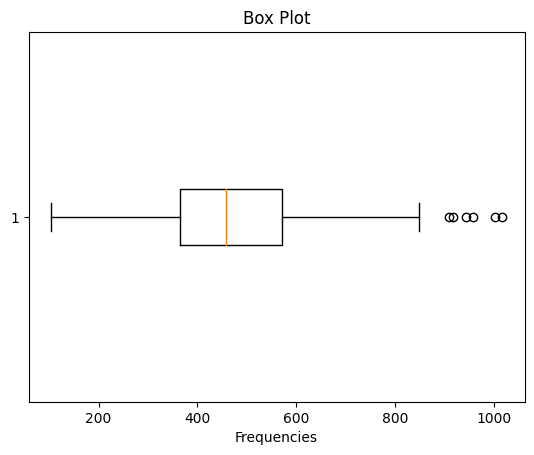

Box Plot Information:
Minimum: 104.0
First Quartile (Q1): 365.0
Median: 459.0
Third Quartile (Q3): 571.0
Maximum: 849.0


In [46]:
# Create a box plot
box = plt.boxplot(df['FREQUENCIES'], vert=False)

# Set labels and title
plt.xlabel('Frequencies')
plt.title('Box Plot')

# Display the plot
plt.show()

# Calculate the statistics for the box plot
statistics = {
    'min': np.min(box['whiskers'][0].get_data()[0]),
    'q1': np.percentile(box['boxes'][0].get_data()[0], 25),
    'median': np.median(box['medians'][0].get_data()[0]),
    'q3': np.percentile(box['boxes'][0].get_data()[0], 75),
    'max': np.max(box['whiskers'][1].get_data()[0])
}

# Print the information
print("Box Plot Information:")
print(f"Minimum: {statistics['min']}")
print(f"First Quartile (Q1): {statistics['q1']}")
print(f"Median: {statistics['median']}")
print(f"Third Quartile (Q3): {statistics['q3']}")
print(f"Maximum: {statistics['max']}")


The trend of traffic fine frequencies each day over the year 2020 is observed from the following line chart.

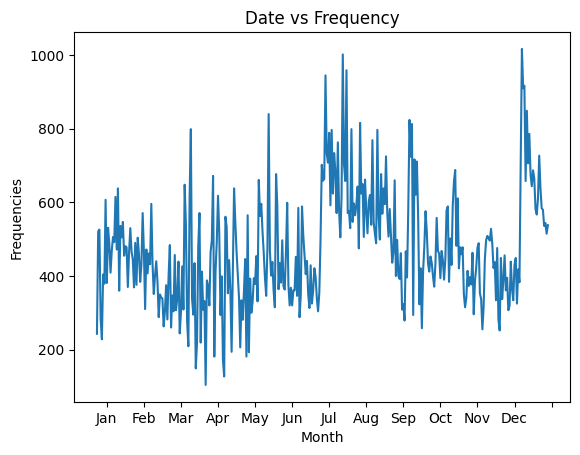

In [47]:
# Frequencies of traffic fines each day over the year.
plt.plot(df['DATE'], df['FREQUENCIES'])
plt.xlabel('Month')
plt.ylabel('Frequencies')
plt.title('Date vs Frequency')
plt.xticks(df['DATE'], df['DATE'].dt.strftime('%b'))
max_ticks = 14
locator = ticker.MaxNLocator(max_ticks)
plt.gca().xaxis.set_major_locator(locator)
plt.show()

The count of traffic violations exhibits a rising pattern from July to September.

More insights are observed from the following bar chart.  

Text(0.5, 1.0, 'Date vs Frequency')

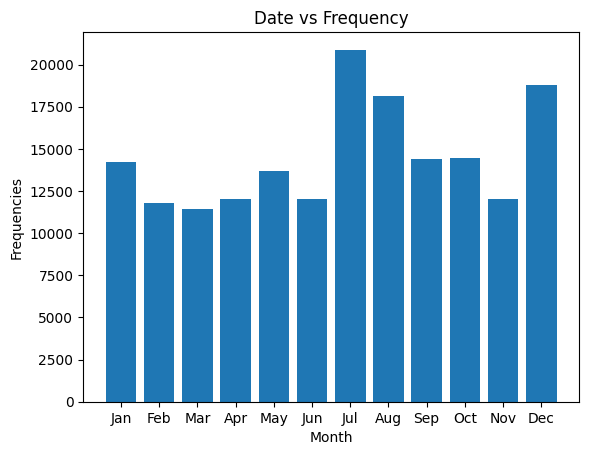

In [48]:
# Group the data by month and sum the frequencies
df_monthly = df.groupby(df['DATE'].dt.month)['FREQUENCIES'].sum()
df_month_names = df.groupby(df['DATE'].dt.month)['DATE']
month_names = [calendar.month_name[i][:3] for i in df_monthly.index]
plt.bar(month_names, df_monthly.values)
plt.xlabel('Month')
plt.ylabel('Frequencies')
plt.title('Date vs Frequency')


In the month of July, the highest number of instances was observed.

The bar charts presented below depict the frequency of events on a quarterly basis.

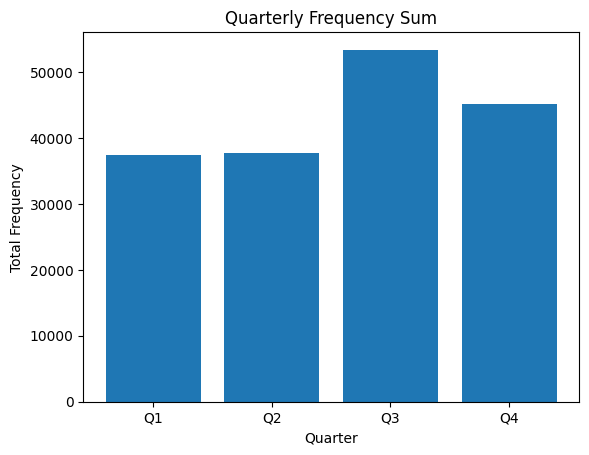

In [49]:
# Group the data by quarter and sum the frequencies
df_quarterly = df.resample('Q', on='DATE')['FREQUENCIES'].sum()

# Get the quarter labels
quarter_labels = [f'Q{i+1}' for i in range(len(df_quarterly))]

# Plot the data as a bar chart
plt.bar(quarter_labels, df_quarterly)
plt.xlabel('Quarter')
plt.ylabel('Total Frequency')
plt.title('Quarterly Frequency Sum')

plt.show()

As anticipated based on the previous data, the third quarter stands out with the highest number of incidents.

The following chart illustrates the temperature data throughout the year. 

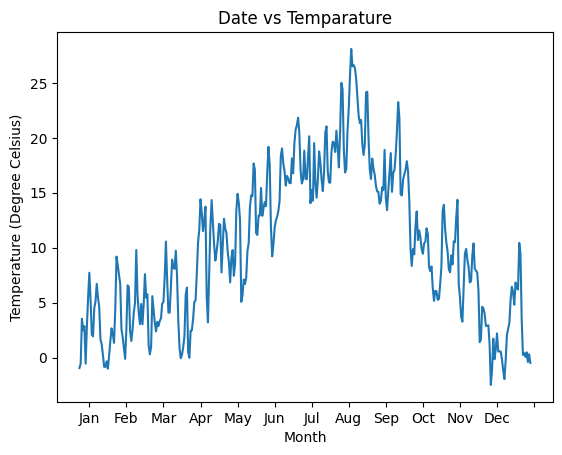

In [50]:
plt.plot(df['DATE'], df['T2M'])

plt.xticks(df['DATE'], df['DATE'].dt.strftime('%b'))
max_ticks = 14
locator = ticker.MaxNLocator(max_ticks)
plt.gca().xaxis.set_major_locator(locator)

plt.xlabel('Month')
plt.ylabel('Temperature (Degree Celsius)')
plt.title('Date vs Temparature')
plt.show()

Overall, the third quarter experiences the highest temperature.

The below chart displays the precipitation information for the entire year.

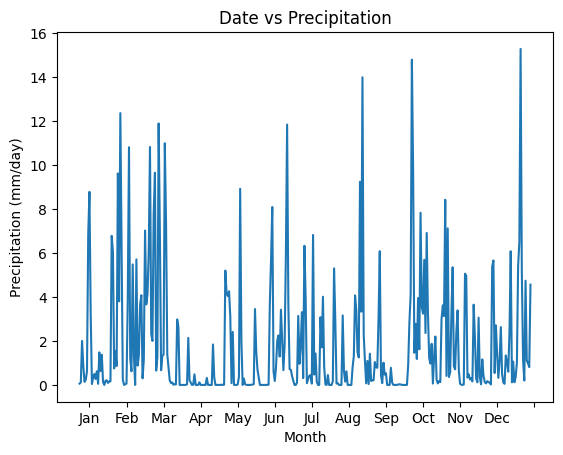

In [51]:
plt.plot(df['DATE'], df['PRECTOTCORR'])

plt.xticks(df['DATE'], df['DATE'].dt.strftime('%b'))
max_ticks = 14
locator = ticker.MaxNLocator(max_ticks)
plt.gca().xaxis.set_major_locator(locator)

plt.xlabel('Month')
plt.ylabel('Precipitation (mm/day)')
plt.title('Date vs Precipitation')
plt.show()

Regular precipitation was recorded at the beginning and end of the year. However, there was intermittent rain in the middle of the year.

The below chart provides insights into the wind speed throughout the year.

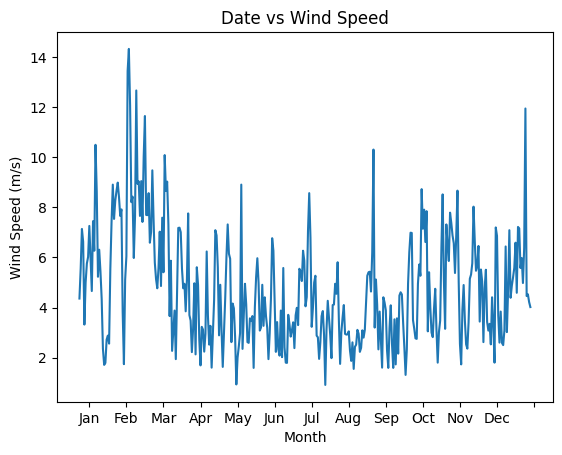

In [52]:
plt.plot(df['DATE'], df['WS10M'])
plt.xticks(df['DATE'], df['DATE'].dt.strftime('%b'))
max_ticks = 14
locator = ticker.MaxNLocator(max_ticks)
plt.gca().xaxis.set_major_locator(locator)
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')
plt.title('Date vs Wind Speed')
plt.show()

The wind speed observed during the first quarter was greater compared to the rest of the year.

### Correlation Analysis
To get the correlation between the frequencies of traffic fines and weather data, the following charts are created by combining the above charts.

In [53]:
def normalize(s):
    # Perform min-max normalization
    # Normalize to range [0, 1]
    normalized_s = (s - s.min()) / (s.max() - s.min())
    return normalized_s

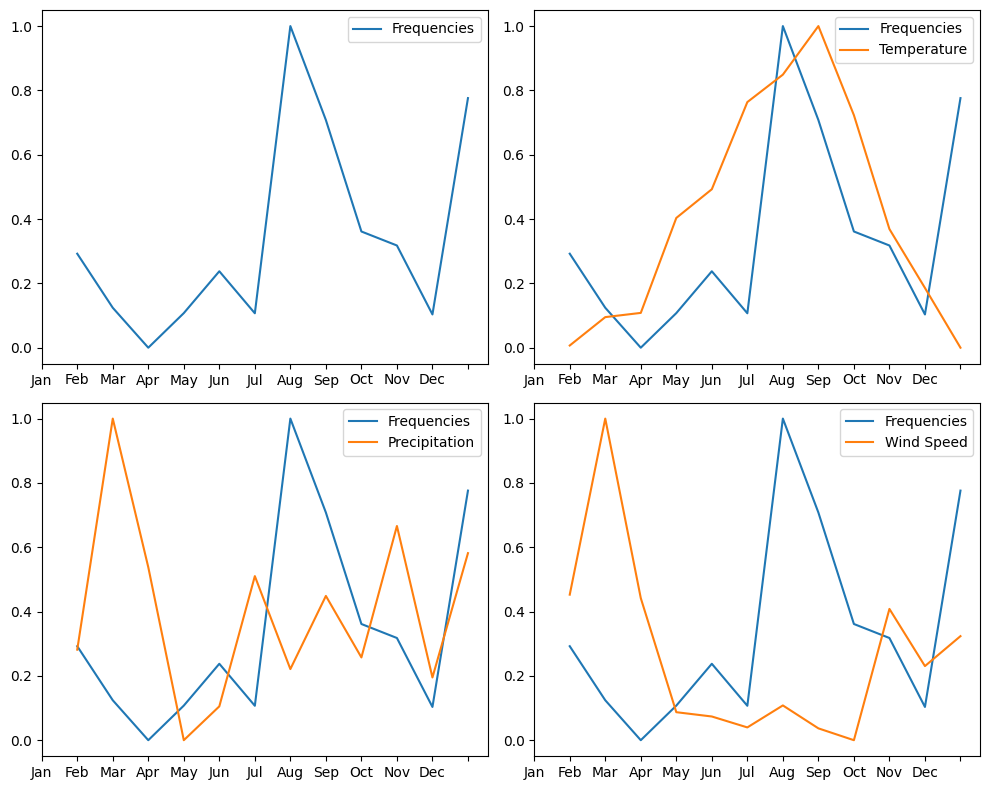

In [54]:
# Group the data by month
# Get the mean of the frequencies, temperature, precipitation and wind speed
# Normalize the data in range 0 and 1
df_monthly_f = normalize(df.groupby(df['DATE'].dt.month)['FREQUENCIES'].mean())
df_monthly_t = normalize(df.groupby(df['DATE'].dt.month)['T2M'].mean())
df_monthly_p = normalize(df.groupby(df['DATE'].dt.month)['PRECTOTCORR'].mean())
df_monthly_w = normalize(df.groupby(df['DATE'].dt.month)['WS10M'].mean())

month_names = [calendar.month_name[i][:3] for i in df_monthly.index]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot for Frequencies
axes[0][0].plot(df_monthly_f, label='Frequencies')
axes[0][0].legend()

# Plot for Temperature
axes[0][1].plot(df_monthly_f, label='Frequencies')
axes[0][1].plot(df_monthly_t, label='Temperature')
axes[0][1].legend()

# Plot for Precipitation
axes[1][0].plot(df_monthly_f, label='Frequencies')
axes[1][0].plot(df_monthly_p, label='Precipitation')
axes[1][0].legend()

# Plot for Wind Speed
axes[1][1].plot(df_monthly_f, label='Frequencies')
axes[1][1].plot(df_monthly_w, label='Wind Speed')
axes[1][1].legend()

# Set x-axis tick labels to month names
for ax_row in axes:
    for ax in ax_row:
        ax.set_xticks(range(len(month_names)))
        ax.set_xticklabels(month_names)

# Adjust the number of ticks based on max_ticks
max_ticks = 14
locator = ticker.MaxNLocator(max_ticks)
for ax_row in axes:
    for ax in ax_row:
        ax.xaxis.set_major_locator(locator)
    
# Adjust spacing between subplots
plt.tight_layout()

plt.show()

### Summary
Correlations between traffic fine occurrences and weather data are found by exploring the datasets. The main takeaways are:
1. Occurances of speed limit exceeding by driving are higher in quantity in the latter half period of the year.
2. These occurrences are reported highest in the 3rd quarter of the year.
3. Overall, the frequency of traffic fines correlates with the temperature, it increases as the temperature rise.
4. In terms of precipitation, less number of fines were incurred in the first quarter during high precipitation. Nevertheless, this trend fluctuates through the rest of the year. Therefore, It can be concluded that precipitation does not have much correlation with traffic fines.
5. Fines are incurred higher in number when the wind speed is lower and vice versa. In other words, there is a strong relation between the speed limit exceeding behavior with the wind speed.

In conclusion, the behavior of exceeding the speed limit is highly correlated with the temperature and wind speed. However, precipitation does not have a valuable connection with traffic fines.

NOTE: This conclusion is only derived from the exploration of the data. There might be other factors such as variation in the number of authorities patrolling at a particular time, relaxed mode of authority, number of traffics on the road, impacting factors like vacation, etc which are not considered here.

### Future Work
In terms of future work, there are several potential avenues to explore based on the current progress and findings:
1. Datasets from other years such as 2017, 2018, 2019, etc can be used to gain more confidence in the summary.
2. Dive deeper into the existing data by applying advanced analytical techniques and exploring additional variables. This can help uncover hidden patterns, relationships, or anomalies that were not initially considered.
3. Other parameters from weather data can be considered for more rigorous investigation.
4. Correlation analysis could be improved with more statistical analysis such as correlation coefficients.
5. Consider incorporating external data sources or gathering additional data to enhance the existing dataset. This can provide a broader perspective and more comprehensive insights into the problem at hand. For instance, datasets related to the number of traffics on the road during a particular period can be used.